# New York City Restaurant Inspections

We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. 
The data is in the file <a href="NYCRestaurants.csv">NYCRestaurants.csv</a>.

In [33]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [34]:
# The dtype=str tells Pandas to load in all columns as strings.
# I do this because I know they are strings, and Pandas doesn't have to spend time figuring out the column dtypes.
df = pd.read_csv('NYCRestaurants.csv', dtype=str)

#### [Q1, 6 points] Create a unique name for each restaurant.
On the DataFrame created above, add a new column to your DataFrame called 'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example:
<pre>WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN</pre>

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [35]:
df['RESTAURANT'] = df['DBA']+ ' '+ df['BUILDING']+ ' ' +df['STREET']+' ' +df['ZIPCODE']+' ' +df['BORO']
df['RESTAURANT'].head(10)

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### [Q2, 6 points] How many restaurants are included in the data?
Careful now:

*  A *Subway* in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [36]:
len(df['RESTAURANT'].drop_duplicates())

10114

#### [Q3, 6 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [37]:
len(df[df['DBA'].map(df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()) > 1]['DBA'].drop_duplicates())

368

#### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<Axes: >

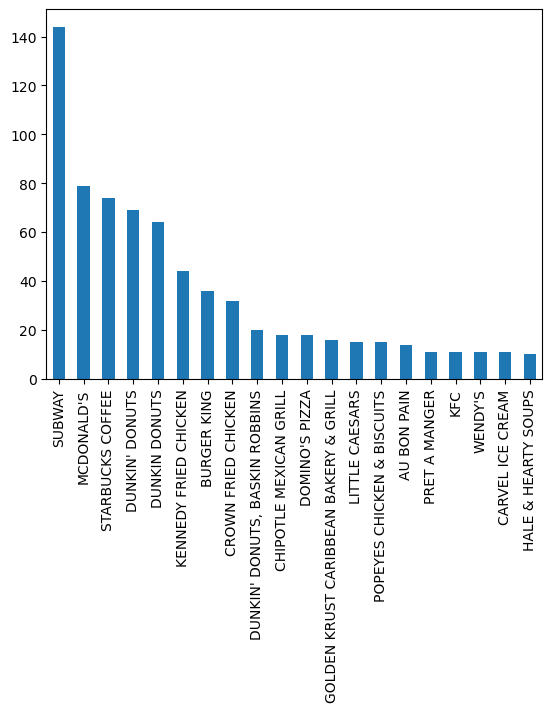

In [38]:
df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()[:20].plot(kind = 'bar')

#### [Q5, 6 points] What fraction of all restaurants are chain restaurants?

You should think of a restaurant as being one restaurant at one location.
So *Wendy's 5th Street* and *Wendy's on 10th Street* are two different restaurants.
Essentially a restaurant is what you defined in Q1.

In [39]:
df_chain = (df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()>1).to_frame().reset_index()
df_chain.columns = ['DBA','Chain']
df =df.merge(df_chain, how='left')
fra = round(df[df["Chain"] == True]['RESTAURANT'].nunique()/df['RESTAURANT'].nunique(),3)*100
print("{}% of the total restaurants are chain restaurants".format(fra))

16.5% of the total restaurants are chain restaurants


#### [Q6, 6 points] Plot the number of non-chain restaurants in each boro.

We need several steps:
* Figure out all the non-chain restaurants.
* Then elect out only those restaurants.
* Finally plot the number of such restaurants by boro. 
* Make sure to look at the plot; we don't want to see... oh... the *missing* boro.

<Axes: >

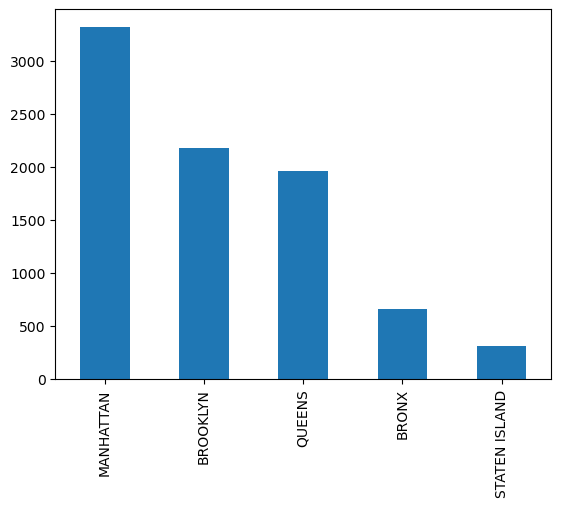

In [40]:
df[df['Chain']== False][['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts().drop("Missing").plot(kind= 'bar')

#### [Q7, 8 points] Plot the *fraction* of non-chain restaurants in each boro.
The boro with the most non-chain restaurants might just be the boro
with the most restaurants in general.

If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

<Axes: >

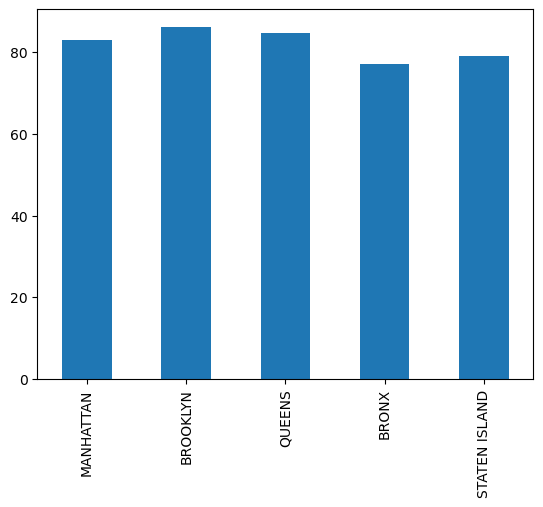

In [41]:
df_non_chain_count = df[df['Chain']== False][['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts().drop("Missing").to_frame()
df_non_chain_count.columns = ['Non_Chain_Count']
df_total_count = df[['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts().drop("Missing").to_frame()
df_total_count.columns = ['Total_Count']
df2 = pd.merge(df_total_count, df_non_chain_count, left_index=True, right_index=True)
df2
df2['Fraction'] = round(df2["Non_Chain_Count"] / df2["Total_Count"],3)*100
df2['Fraction'].plot(kind ='bar')

#### [Q8, 6 points] Plot the popularity of cuisines.
Which cuisines are the most well-represented among all restaurants?

* Define the popularity of a cuisine as the number of restaurants serving that cuisine.
* Plot the popularity of the top 20 cuisines.

<Axes: >

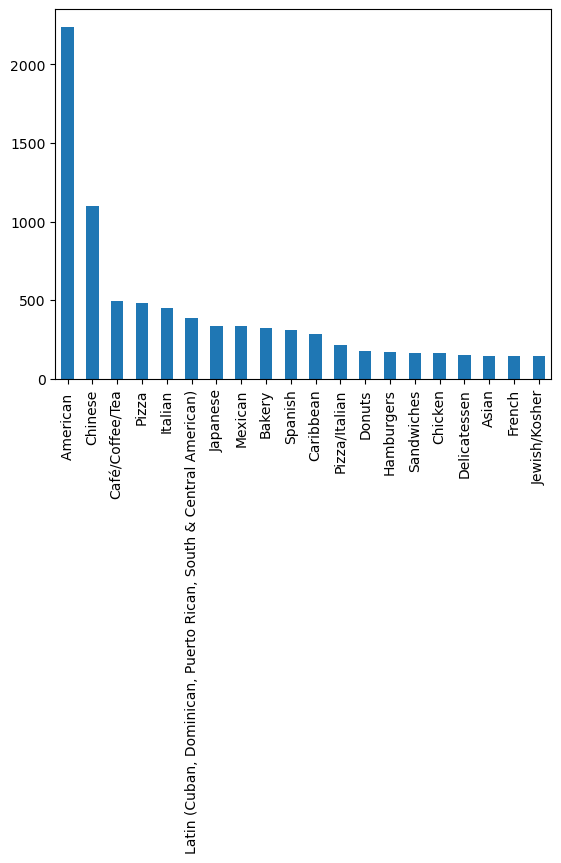

In [42]:
df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind ='bar')

#### [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.
Ideally, you should explore and see what happens when there is no
violation, but here I will just tell you: the 'VIOLATION CODE' field
is missing.

* First, find the restaurants that were **never** cited for a code violation. 
* Then. compute the popularity of each cuisine among these "clean" restaurants.
* Plot the popularity of the top-20 among these cuisines.

<Axes: >

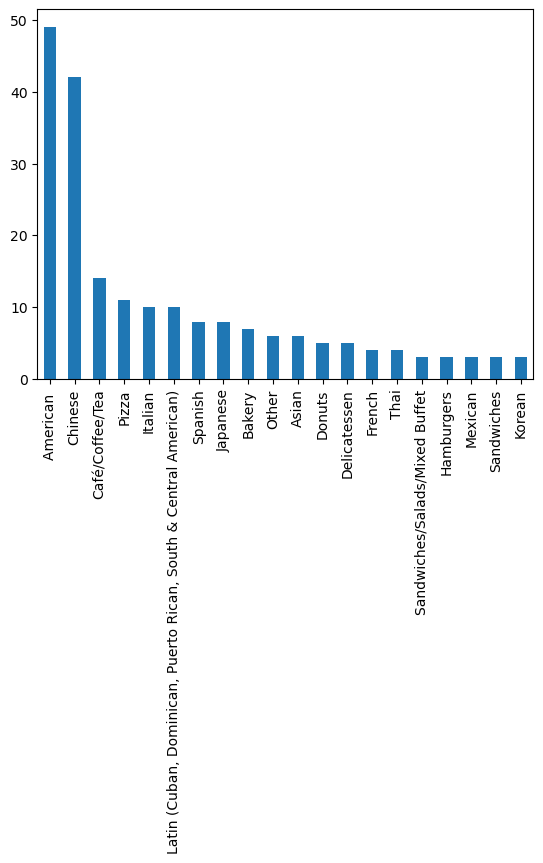

In [46]:
Clean_restaurants = df[['CUISINE DESCRIPTION','RESTAURANT','VIOLATION CODE']].drop_duplicates()
Clean_restaurants = Clean_restaurants.sort_values(by=['RESTAURANT','VIOLATION CODE']).drop_duplicates(subset=['RESTAURANT'])
Clean_restaurants = Clean_restaurants[Clean_restaurants['VIOLATION CODE'].isnull()]
#print(Clean_restaurants.head(5))
Clean_restaurants['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

#### [Q10, 6 points] What cuisines tend to be the "cleanest"?

* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean."

In [47]:
Cuisines = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
#print(Cuisines[Cuisines >= 20])
Clean_Cuisines = Clean_restaurants[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
#Clean_Cuisines.loc[list(Cuisines[Cuisines >=20].index)]/Cuisines[Cuisines >= 20].loc[list(Clean_Cuisines.index)]
Den = Cuisines.loc[list(Clean_Cuisines.index)]
Num = Clean_Cuisines.loc[list(Den[Den >=20].index)]
Den = Cuisines.loc[list(Num.index)]
print((Num/Den).sort_values(ascending=False)[:10])

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Barbecue                         0.047619
Continental                      0.047619
Soups & Sandwiches               0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


#### [Q11, 8 points] What are the most common violations in each  borough?

* Create a table of the number of times each violation description was observed in each borough.
    * To create the table, check out the **crosstab** function. We will see a more general version of this when we discuss **groupby** in class.
* Figure out the most common violation description for each borough.

In [50]:
Violations_df = df[['BORO','VIOLATION DESCRIPTION']]
common_violations = pd.crosstab(Violations_df['BORO'], Violations_df['VIOLATION DESCRIPTION'])#, values=Violations_df['VIOLATION DESCRIPTION'], aggfunc='count')
#common_violations = pd.crosstab(Violations_df['BORO'], Violations_df['VIOLATION DESCRIPTION'], aggfunc='count')
print(common_violations.idxmax(axis=1))

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


#### [Q12, 9 points] What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough.
A better approach would be to **normalize** the violation counts, as
follows.

* **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let's call this <tt>violationFrequency</tt>.
* **Normalize:** Consider the table of number of violations by borough that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by <tt>violationFrequency</tt>. We want to do this **for each borough**.
* **Find the biggest violations:** After this normalization, for each borough, figure out the most common violation description.

In [51]:
(common_violations/df['VIOLATION DESCRIPTION'].value_counts()).idxmax(axis=1)

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

#### [Q13, 8 points] How many phone area codes correspond to a single zipcode?
The first three digits of the restaurant phone numbers are their area
codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. You must figure out how
many area codes have this property.

*Hint:* To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [52]:
df_phone = df[['PHONE','ZIPCODE']]
df_phone['Area_Code'] = df['PHONE']
df_phone['AREA_CODE'] = df_phone.loc[ :,'PHONE'].str[:3]
area_code_zip_counts = df_phone.groupby('AREA_CODE')['ZIPCODE'].nunique()
single_zip_area_codes_count = area_code_zip_counts[area_code_zip_counts == 1].count()
single_zip_area_codes_count

C:\Users\naray\AppData\Local\Temp\ipykernel_18744\3195614638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone['Area_Code'] = df['PHONE']
C:\Users\naray\AppData\Local\Temp\ipykernel_18744\3195614638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone['AREA_CODE'] = df_phone.loc[ :,'PHONE'].str[:3]


34

#### [Q14, 10 points] Find common misspellings of street names.
Sometimes, it's "Avenue", and sometimes, it's "Ave". We will
try to come up with an automated way to find common misspellings. The
idea is the following: if "Ave" and "Avenue" are the same,
they should show up often in similar-sounding street names, e.g., *Lexington Ave* and *Lexington Avenue*.

* Create a new column, called <tt>STREET TYPE</tt>, which is the the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street type should be *Boulevard*.
* Create another column, called <tt>STREET BASE</tt>, which contains everything **except** the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street base should be *Astoria*.
* Create a third column, called <tt>STREET BASE & ZIP</tt>, that combines the street base and the zipcode.
* Create a table containing just these three columns, and remove any duplicates or instances where street base is empty.
    * This table now contains unique street names, along with the street type.
* Merge this table with itself, on the <tt>STREET BASE & ZIP</tt> column. 
    * Thus, in the new merged tabled, we will have two <tt>STREET TYPE</tt> fields for each street base and zipcode.
    * For example, if both *Lexington Ave* and *Lexington Avenue* exist in the same zipcode, we will get a row for the street base *Lexington* and the two street types *Ave* and *Avenue*.
* From the merged table, select only the rows where the street types are different.
* Now, do a cross-tabulation of the two distinct street types (check out the **crosstab** function in Pandas).
    * This gives us the number of times *Ave* and *Avenue* were used with the same <tt>STREET BASE & ZIP</tt>.
* From this cross-tabulation table, find the most commonly street type that occurs with each of the following: *AVE*, *ST*, *RD*, *PL*, *BOULEARD*, and *BULEVARD*.

In [53]:
df['STREET TYPE'] = df['STREET'].str.split().str[-1]
df['STREET BASE'] = df['STREET'].str.rsplit(n=1).str[0]
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']
unique_streets_df = df[['STREET BASE & ZIP', 'STREET BASE', 'STREET TYPE']].dropna().drop_duplicates()
merged_df = pd.merge(unique_streets_df, unique_streets_df, on='STREET BASE & ZIP')
merged_df = merged_df[merged_df['STREET TYPE_x'] != merged_df['STREET TYPE_y']]
cross_tab = pd.crosstab(merged_df['STREET TYPE_x'], merged_df['STREET TYPE_y'])
most_common_street_types = cross_tab.idxmax().loc[['AVE', 'ST','RD', 'PL', 'BOULEARD','BULEVARD']]
print("Most Common Street Types:")
print(most_common_street_types)

Most Common Street Types:
STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object
